## Data Imports and Preprocessing

**Import the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score, confusion_matrix,classification_report
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

**Import and view the data**

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Get the information of the data** 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#check for duplicates
df.duplicated().sum()

0

   **Observations**
1. There are 768 rows and 9 columns in the dataset.
2. There are no null values.
3. All the data are numerical(float or int).
4. Outcome is an int (0=No diabetic, 1=Diabetic)
5. There are no duplicate rows.

**Get the descriptives of the data** 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Glucose,Blood pressure,insulin,BMI and Skin Thickness have minimum value of 0 , which is an error.So we need to impute them seperately for each variable with respective median values

**Impute the null values ( 0 values ) with column median**

In [8]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].median())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())

In [9]:
cols=df.columns[1:6]
zerofill=lambda x: x.replace(0,x.median)
df[cols]=df[cols].apply(zerofill,axis=0)

In [10]:
df[df.columns[:]].agg('min')

Pregnancies                  0.000
Glucose                     44.000
BloodPressure               24.000
SkinThickness                7.000
Insulin                     14.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

**Seperate the features and label and perforn the train test split**

In [12]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


## Fit a Logistic Regression Model

**Fit the logistic regression model** 

In [13]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

**Get the predicted probabilities** 

In [14]:
y_pred_probs=logreg.predict_proba(x_test)[:,1]

In [16]:
df_probs=pd.DataFrame({'Probabilities':y_pred_probs,'Label':y_pred})

df_probs.sample(5)

,Probabilities,Label
125,0.125784,0
97,0.205814,0
78,0.208431,0
28,0.106866,0
115,0.053863,0


**Plot the ROC Curve**

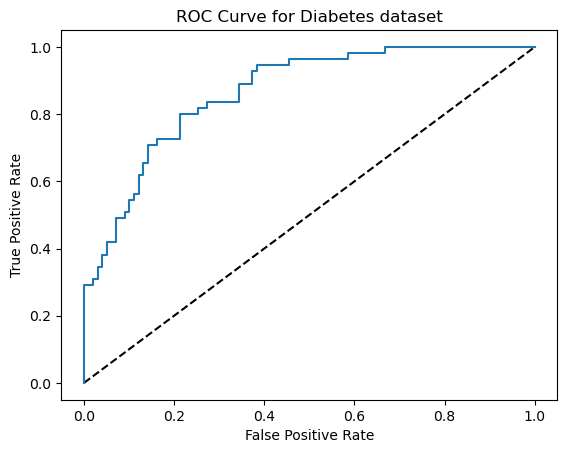

In [18]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_probs)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Diabetes dataset")
plt.show()

**Calculate the ROC AUC**

In [20]:
roc_auc=roc_auc_score(y_test,y_pred_probs)
roc_auc  #above 75 is a good score

0.8653810835629017

**Calculate the other evaluation metrics** 

In [22]:
score_card=pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','F1'])
results=pd.DataFrame([{
    'Model':'LogisticRegression','Accuracy':accuracy_score(y_test,y_pred),
'Precision':precision_score(y_test,y_pred),
'Recall':recall_score(y_test,y_pred),
'F1':f1_score(y_test,y_pred)}])
score_card=pd.concat([score_card,results],ignore_index=True)


,Model,Accuracy,Precision,Recall,F1
0,LogisticRegression,0.779221,0.733333,0.6,0.66


In [23]:
score_card

,Model,Accuracy,Precision,Recall,F1
0,LogisticRegression,0.779221,0.733333,0.6,0.66


**Coefficients (Weights) of features**

In [28]:
coefs=logreg.coef_[0]
coefs

array([ 1.30491939e-01,  3.47854801e-02, -1.70227531e-02, -9.22451395e-03,
       -1.36024965e-03,  8.81975517e-02,  1.53623159e+00,  8.21138745e-03])

**Odds ratio of features**

In [30]:
odd=np.exp(coefs)
odd

array([1.13938876, 1.03539757, 0.98312132, 0.9908179 , 0.99864068,
       1.09220387, 4.64704524, 1.00824519])

**Table of Odd Ratios**

In [32]:
or_table=pd.DataFrame({
    'Predictor':X.columns,
    'Coefs':coefs,
    'Odd':odd})

or_table

,Predictor,Coefs,Odd
0,Pregnancies,0.130492,1.139389
1,Glucose,0.034785,1.035398
2,BloodPressure,-0.017023,0.983121
3,SkinThickness,-0.009225,0.990818
4,Insulin,-0.001360,0.998641
5,BMI,0.088198,1.092204
6,DiabetesPedigreeFunction,1.536232,4.647045
7,Age,0.008211,1.008245


DiabetesPedigreeFunction, pregnancies, BMI and Glucose appear to be significant predictors of diabetes

**Find the significant features based on p_vals based on a Logit Model**

In [35]:
import statsmodels.api as sm
x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)
logit=sm.Logit(y_train,x_train).fit()
logit.summary()



Optimization terminated successfully.
         Current function value: 0.469994
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Sat, 27 Jul 2024   Pseudo R-squ.:                  0.2719
Time:                        17:19:19   Log-Likelihood:                -288.58
converged:                       True   LL-Null:                       -396.34
Covariance Type:            nonrobust   LLR p-value:                 3.380e-42
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.7197      0.894     -9.757      0.000     -10.471      -6.968
Pregnancies                  0.1227      0.035      3.457      0.001       0.053       0.192
Glucose                      0.0372      0.004      8.860      0.000       0.029       0.045
BloodPressure               -0.0131      0.009     -1.397      0.162      -0.031       0.005
SkinThickness               -0.0054      0.014     -0.395      0.693      -0.032       0.021
Insulin                     -0.0013      0.001     -1.298      0.194      -0.003       0.001
BMI                          0.1029      0.020      5.223      0.000       0.064       0.141
DiabetesPedigreeFunction     0.7191      0.332      2.167      0.030       0.069       1.370
Age                          0.0125      0.011      1.188      0.235      -0.008       0.033
============================================================================================
"""


Pregnancies, Glucose, BMI and DPF are significant predictors of diabetes based on p-values

## Fit and evaluate a Naive Bayes Model


In [37]:
from sklearn.naive_bayes import GaussianNB
nbm=GaussianNB()
nbm.fit(x_train,y_train)
y_pred=nbm.predict(x_test)

In [38]:
results=pd.DataFrame([{
    'Model':'NaiveBayes',
    'Accuracy':accuracy_score(y_test,y_pred),
'Precision':precision_score(y_test,y_pred),
'Recall':recall_score(y_test,y_pred),
'F1':f1_score(y_test,y_pred)}])
score_card=pd.concat([score_card,results],ignore_index=True)
score_card

,Model,Accuracy,Precision,Recall,F1
0,LogisticRegression,0.779221,0.733333,0.600000,0.660000
1,NaiveBayes,0.753247,0.666667,0.618182,0.641509


In [40]:
print(confusion_matrix(y_test,y_pred))

[[82 17]
 [21 34]]


In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



# END